# Answering task questions with data provided

## Source: https://www.kaggle.com/sobhanmoosavi/us-accidents/tasks

### Pre-processing

In [2]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Basic EDA

In [16]:
#Import data and analyze
data = r'/Users/OliverPan/Desktop/accidents.csv'

In [17]:
us_accidents = pd.read_csv(data)

In [18]:
us_accidents.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


### Task 1: State with highest number of accidents

In [32]:
#Filter df so that it is easier to read
num_accidents = us_accidents[["State"]]

In [33]:
#Number of accident data collected
len(num_accidents)

3513617

In [34]:
num_accidents = num_accidents.groupby(["State"])["State"].count().to_frame()
num_accidents.columns = ["accident_count"]
num_accidents = num_accidents.sort_values(by = "accident_count", ascending = False)
num_accidents.head()

,accident_count
State,
CA,816825
TX,329284
FL,258002
SC,173277
NC,165958


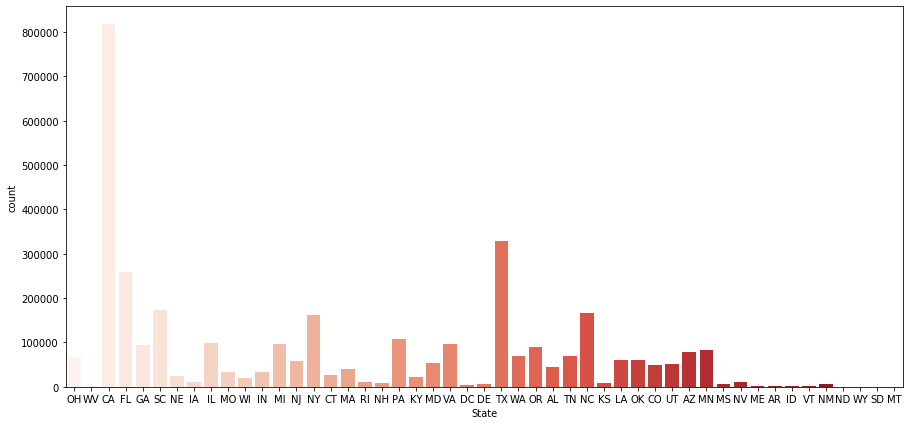

In [69]:
plt.figure(figsize=(15,7))
sns.countplot(x = us_accidents["State"], palette = "Reds")

#### We can see that California has the highest amount of accidents from both the plot and groupby

### Task 2: At what time do accidents usually occur?

In [58]:
#Take only the time of accident
time_accident = us_accidents[["ID", "Start_Time"]]

In [59]:
#Put Start_Time into time format
time_accident["Start_Time"] = pd.to_datetime(time_accident["Start_Time"])
time_accident["Start_Time"] = time_accident["Start_Time"].dt.hour

/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
time_accident.head(5)

,ID,Start_Time
0,A-1,5
1,A-2,6
2,A-3,6
3,A-4,7
4,A-5,7


In [65]:
#As there are 24 hours in a day, there are 24 possible hours that an accident occurred at
time_accident["Start_Time"].unique()

24

#### Note: Although we are rounding to the hour, we can go more into depth later (ie. minute)

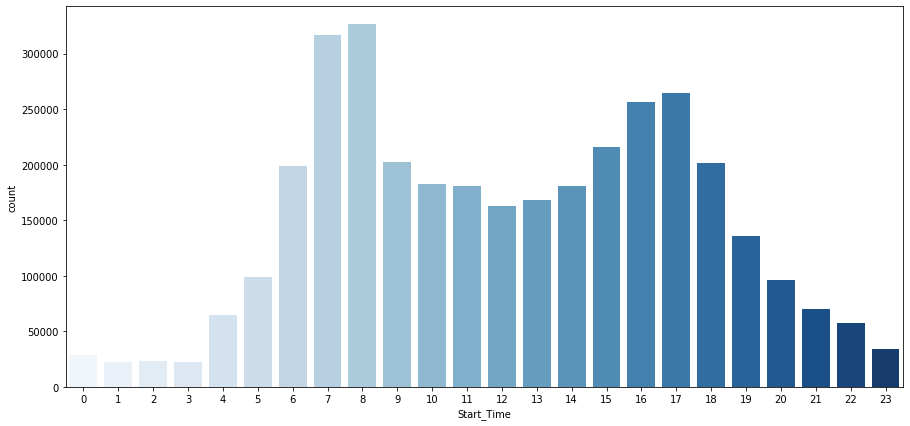

In [67]:
plt.figure(figsize=(15,7))
sns.countplot(x = time_accident["Start_Time"], palette = "Blues")

#### Intuitively, we can see that accidents happen the most around rush hour, so during 9AM and 5PM

### Task 3: Visualize US Accidents Dataset